In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gnd_data = pd.read_csv("../data/full_gnd_emolex_modified.csv")

In [3]:
gnd_data.columns

Index(['id_str', 'created_at', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'screen_name', 'name', 'location', 'negative', 'positive',
       'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'],
      dtype='object')

In [4]:
emotions = ["positive", "joy", "trust", "surprise", "anticipation", "negative", "anger", "disgust", "fear", "sadness"]

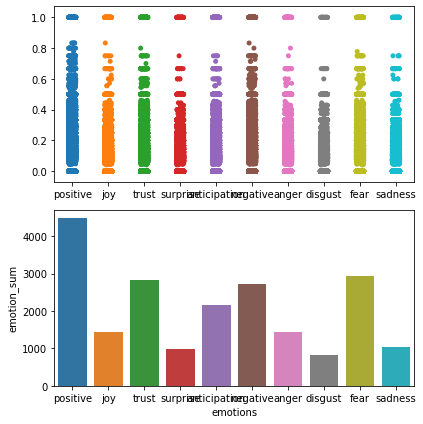

In [5]:
overall_emotions = gnd_data[emotions].sum(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="emotion_sum")
fig, ax = plt.subplots(2, figsize=(6,6))
sns.stripplot(data = gnd_data[emotions], ax=ax[0]) 
sns.barplot(x="emotions", y="emotion_sum", data=overall_emotions, ax=ax[1])
plt.tight_layout()
plt.show()

In [6]:
gnd_topic_1_words = ("Now is the time to act",["need", "time", "support", "action", "fight", "planet", "address", "stop", "talk", "think"])
gnd_topic_2_words = ("Demand for Action",["explain", "implement", "solution", "lead", "reduce"])
gnd_topic_3_words = ("Policy and Plan?",["global", "warming", "year", "end", "plan", "policy"])
gnd_topic_4_words = ("Fossil Fuel Exploitation",["fossil", "fuel", "cost", "destroy", "rally", "pay", "business", "radical"])
gnd_topic_5_words = ("GND Proposal",["green", "new", "deal", "proposal", "joke", "liberal", "view"])
gnd_topic_6_words = ("Strike for Climate",["extinctionrebellion", "youthstrike4climate", "grevepourleclimat", "schoolsstrike4climate", "schoolstrike4climate"])
gnd_topic_7_words = ("Political Space",["socialism", "capitalism", "government", "inequality", "politics", "transition", "trump", "berniesander"])
gnd_topic_8_words = ("Create???",["create", "community", "sustainable", "protect", "class", "order"])
gnd_topic_9_words = ("All about Bernie?",["leadership", "bernie2020", "people", "lie", "middle", "oil", "poll", "pledge", "news", "chance", "burn", "house"])
gnd_topic_10_words = ("Carbon Tax",["carbon", "day", "tax", "election", "weather", "event", "hoax", "invest"])
gnd_topic_11_words = ("Be Responsible and Support the Cause",["vote", "late", "seriously", "extinction", "supporter", "essay", "fear", "responsible"])
gnd_topic_12_words = ("Save the Planet",["unite", "air", "water", "savetheplanet", "drink", "effective", "loss", "meat"])
topics = [gnd_topic_1_words, gnd_topic_2_words, gnd_topic_3_words, gnd_topic_4_words, gnd_topic_5_words, gnd_topic_6_words, gnd_topic_7_words, gnd_topic_8_words, gnd_topic_9_words, gnd_topic_10_words, gnd_topic_11_words, gnd_topic_12_words]

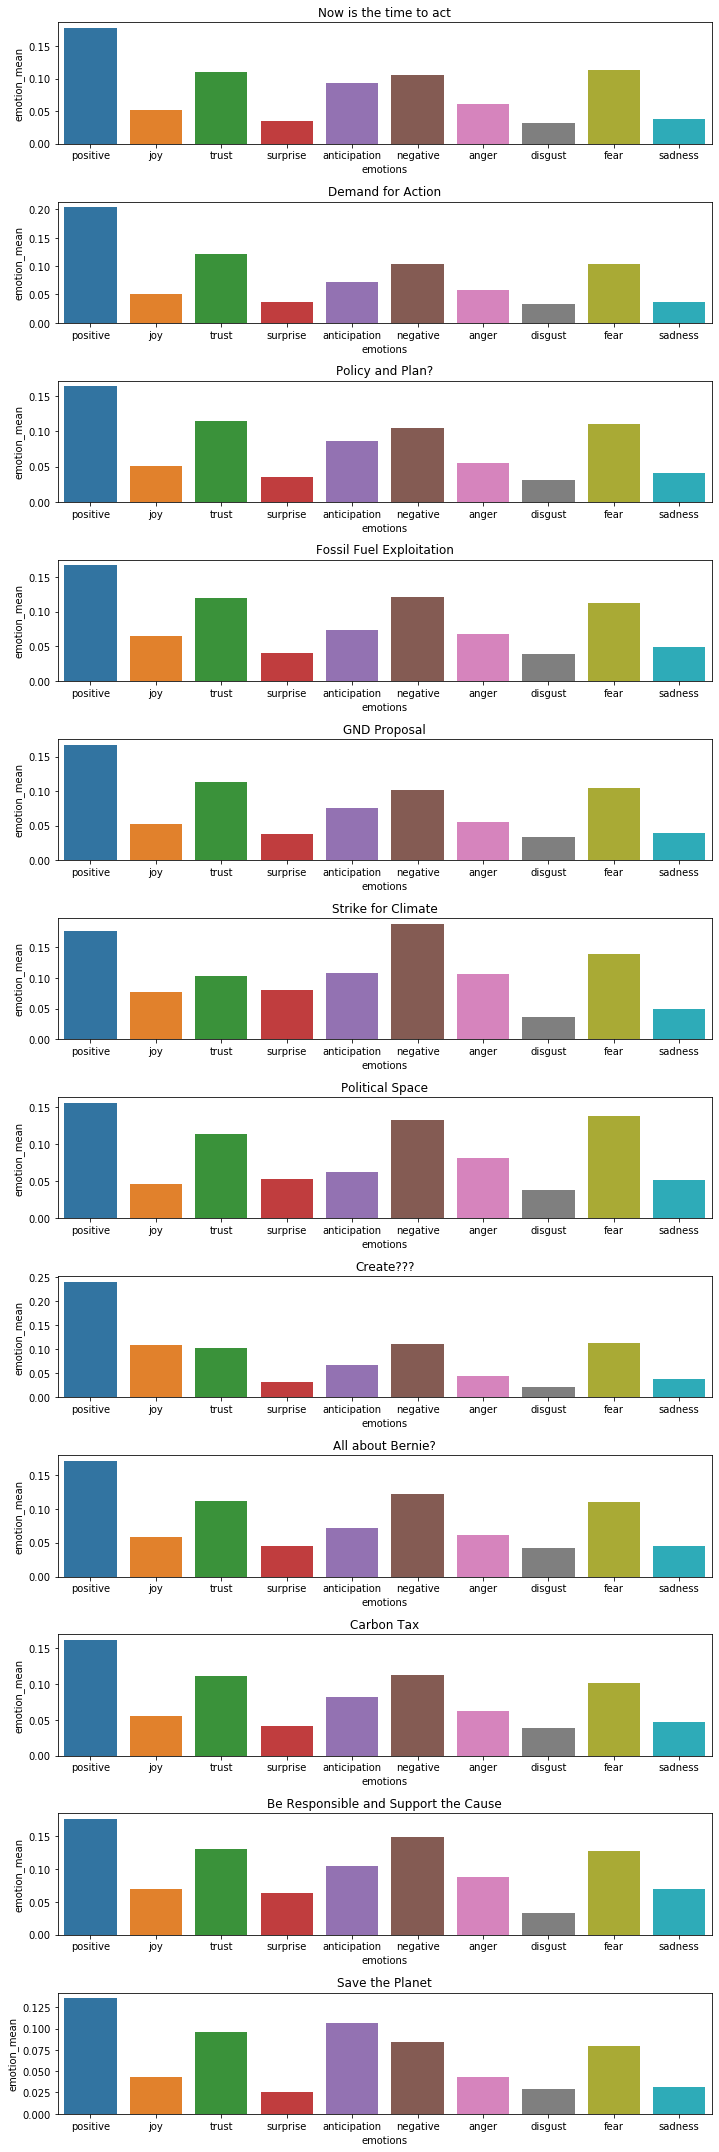

In [7]:
fig, ax = plt.subplots(len(topics), figsize=(10,30))
for idx, topic in enumerate(topics):
    topic_title = topic[0]
    gnd_topic = gnd_data[gnd_data["full_text"].str.contains("|".join(topic[1]), na=False)]
    topic_emotions = gnd_topic[emotions].mean(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="emotion_mean")
    sns.barplot(x="emotions", y="emotion_mean", data=topic_emotions, ax=ax[idx])
    ax[idx].set_title(topic_title)
plt.tight_layout()
plt.show()

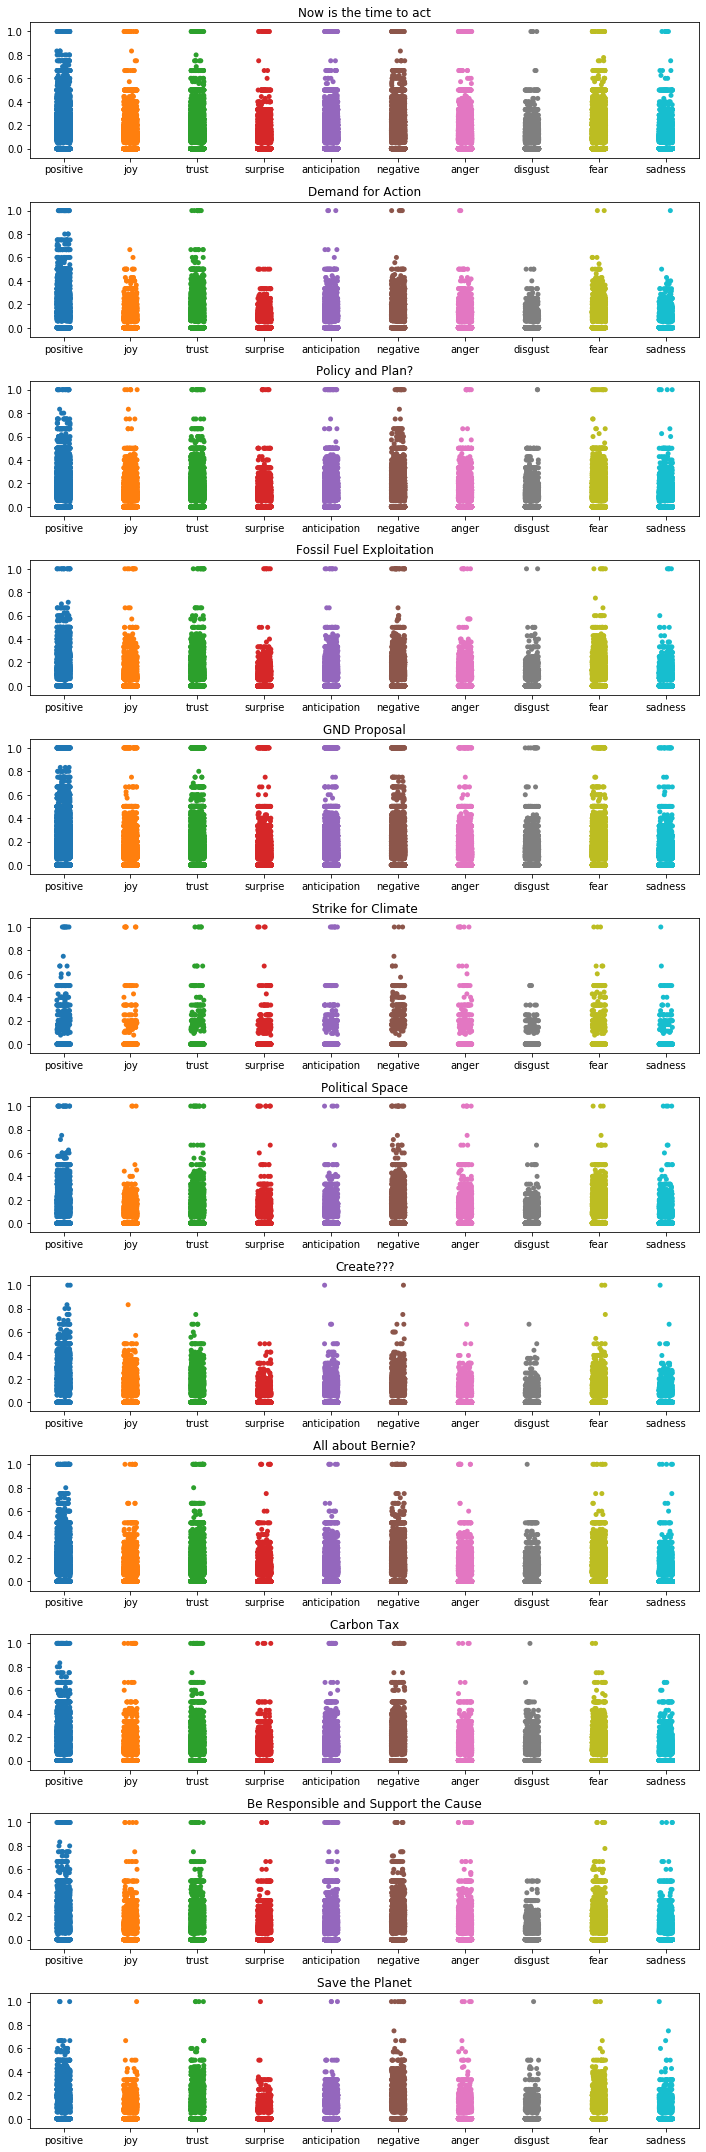

In [8]:
fig, ax = plt.subplots(len(topics), figsize=(10, 30))
for idx, topic in enumerate(topics):
    topic_title = topic[0]
    gnd_topic = gnd_data[gnd_data["full_text"].str.contains("|".join(topic[1]), na=False)]
    sns.stripplot(data = gnd_topic[emotions], ax=ax[idx])
    ax[idx].set_title(topic_title)
plt.tight_layout()
plt.show()